# Data Analisys

We will visualize the variables and datasets present in the competition to understand some existing patterns.

In [1]:
import pandas as pd
import numpy as np
import os 

#import plotly.plotly as py
#import plotly.graph_objs as go

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

/home/eraldo/miniconda2/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/eraldo/miniconda2/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Private DataSet path: ../input/kddbr2018dataset/kddbr-2018-dataset/dataset. This dataset is the same of competitions
#
path = '../input/'
print(os.listdir(path))

['field-8.csv', 'field-2.csv', 'field-18.csv', 'field-24.csv', 'models', 'field-11.csv', 'field-25.csv', 'field-13.csv', 'field-22.csv', 'field-0.csv', 'field-20.csv', 'field-10.csv', 'field-27.csv', 'train.csv', 'field-14.csv', 'field-1.csv', 'field-12.csv', 'tmp', 'field-7.csv', 'field-17.csv', 'sample-submission.csv', 'field-23.csv', 'field-4.csv', 'field-19.csv', 'field-21.csv', 'field-3.csv', 'field-15.csv', 'soil_data.csv', 'field-16.csv', 'test.csv', 'field-9.csv', 'field-5.csv', 'field-26.csv', 'field-6.csv']


## Train and test datasets

Basic data containing palm tree information

In [3]:
df_train = pd.read_csv(os.path.join(path, 'train.csv'))

# Remove data before 2006.
df_train = df_train[df_train.harvest_year >= 2006]

df_test  = pd.read_csv(os.path.join(path, 'test.csv'))
df_all = pd.concat([df_train, df_test])

print(df_train.shape, df_test.shape, df_all.shape)

(4076, 7) (4110, 6) (8186, 7)


In [4]:
df_train.head()

,Id,field,age,type,harvest_year,harvest_month,production
24,24,0,21,5,2006,1,0.121454
25,25,0,21,5,2006,2,0.073829
26,26,0,21,5,2006,3,0.053183
27,27,0,21,5,2006,4,0.031207
28,28,0,21,5,2006,5,0.067851


In [5]:
df_test.head()

,Id,field,age,type,harvest_year,harvest_month
0,5243,0,27,5,2012,1
1,5244,0,27,5,2012,2
2,5245,0,27,5,2012,3
3,5246,0,27,5,2012,4
4,5247,0,27,5,2012,5


In [6]:
df_train.describe()

,Id,field,age,type,harvest_year,harvest_month,production
count,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000
mean,2668.902601,10.602306,12.590530,4.627331,2008.517910,6.474239,0.167168
std,1501.229054,7.795143,6.383214,0.988885,1.720728,3.452688,0.142898
min,24.000000,0.000000,3.000000,0.000000,2006.000000,1.000000,0.000000
25%,1378.750000,4.000000,7.000000,5.000000,2007.000000,3.000000,0.067610
50%,2718.500000,10.000000,11.000000,5.000000,2009.000000,6.000000,0.127749
75%,3942.250000,16.000000,19.000000,5.000000,2010.000000,9.000000,0.224850
max,5242.000000,27.000000,26.000000,6.000000,2011.000000,12.000000,1.000000


In [7]:
df_test.describe()

,Id,field,age,type,harvest_year,harvest_month
count,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.00000
mean,7297.500000,9.284428,16.205109,4.354501,2014.361071,6.43455
std,1186.599132,7.558750,7.473749,1.523124,1.629624,3.39713
min,5243.000000,0.000000,3.000000,-1.000000,2012.000000,1.00000
25%,6270.250000,2.000000,12.000000,5.000000,2013.000000,3.00000
50%,7297.500000,8.000000,14.000000,5.000000,2014.000000,6.00000
75%,8324.750000,15.000000,24.000000,5.000000,2016.000000,9.00000
max,9352.000000,27.000000,30.000000,7.000000,2017.000000,12.00000


In [8]:
def to_date(df):
    return pd.to_datetime((df.harvest_year*10000+df.harvest_month*100+1)\
                                  .apply(str),format='%Y%m%d')
# Add date variable 
for d in [df_train, df_test, df_all]:
    d['date'] = to_date(d)

## Production

Analisys of the variable production

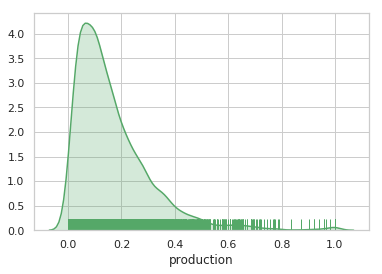

In [9]:
sns.distplot(df_train.production, hist=False, color="g",rug=True, kde_kws={"shade": True})
#sns.boxplot(x="production", y="field", data=df_train, palette="vlag")

In [10]:
print("Mean: ", df_all.production.mean())

Mean:  0.16716831523700906


The #production is normalized betwenn [0,1] with mean 0.16. 

In [11]:
#df_all = df_all[(df_all.production < (df_all.production.mean()+df_all.production.std()*4)) | (df_all.production.isna())]

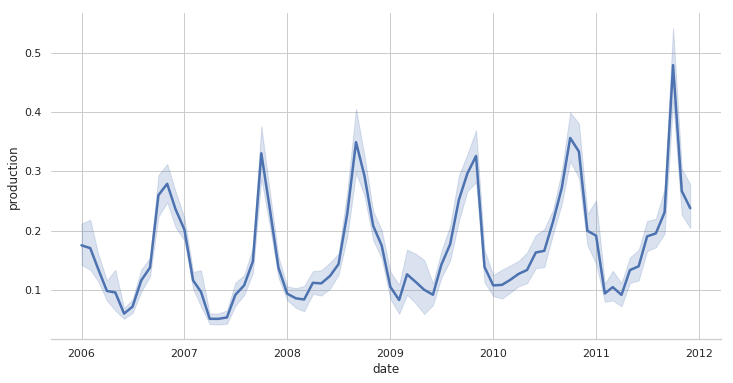

In [12]:
#data = [go.Scatter(x=df_all.date, y=df_all.production)]
#py.iplot(data)

f, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='date', y="production", data=df_all, palette="tab10", linewidth=2.5)

sns.despine(left=True)

Average production per date follows a pattern. The end and beginning of the year is always low production, growing throughout the year until reaching peak production.

The year of 2011 had the highest peak of production of the entire time series, which has been growing over the years.

In [13]:
#df_all = df_all[df_all.harvest_year >= 2006]
df_all.shape

(8186, 8)

It may be necessary to remove the data before 2006 because the production pattern has changed dramatically. This information prior to 2006 may bring noise, a better analysis should be made

### Production per month

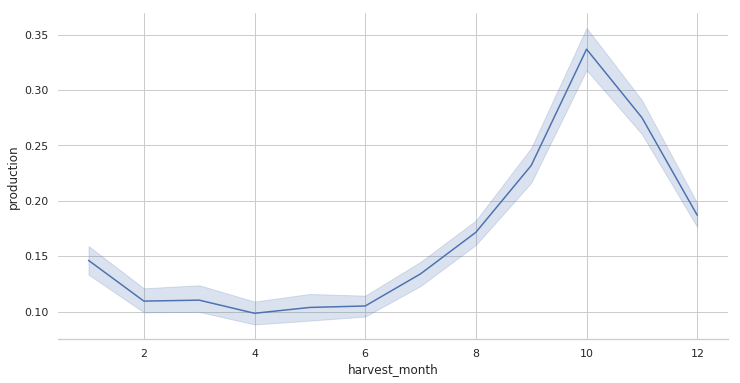

In [14]:
f, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='harvest_month', y="production", data=df_all)

sns.despine(left=True)

An everage of production in the year from month to month. It follows an increase in the year util the peak of production in month 10 and a sudden fall

In [15]:
mean_production = df_all.groupby(['harvest_month']).mean()['production'].reset_index()
mean_production.columns = ['harvest_month', 'production_mean']
mean_production

print(mean_production.shape)
mean_production

(12, 2)


,harvest_month,production_mean
0,1,0.146232
1,2,0.109425
2,3,0.110292
3,4,0.098422
4,5,0.103704
5,6,0.105021
6,7,0.134042
7,8,0.171583
8,9,0.231919
9,10,0.336933


### Production per age

With each harp the palmetto is a certain age. The production may vary with age, I also believe that some types of palm trees can only be harvested in a period of age

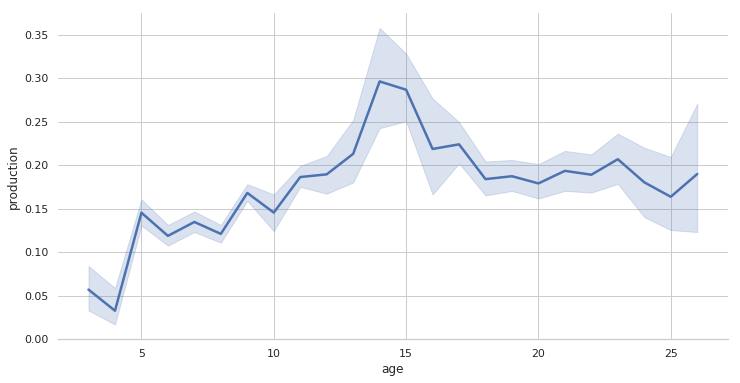

In [16]:
f, ax = plt.subplots(figsize=(12, 6))
#sns.lineplot(x='age', y="production", data=df_group, palette="tab10", linewidth=2.5)
sns.lineplot(x='age', y="production", data=df_all, palette="tab10", linewidth=2.5)

sns.despine(left=True)

The plant reaches its maximum production at 15 years of age. Decreasing after this period. But depende the type

### Count per year

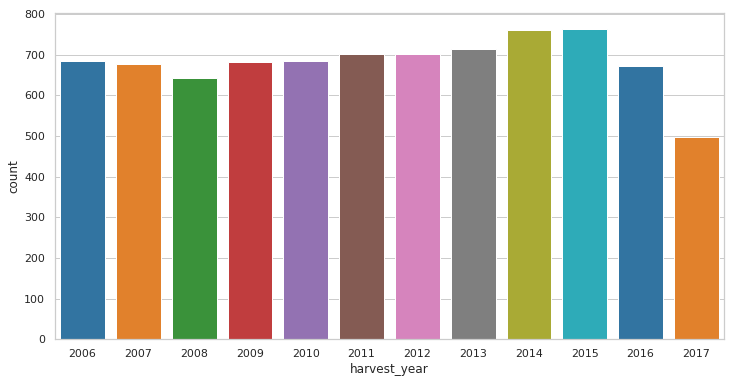

In [17]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="harvest_year", palette="tab10", data=df_all)

### Count per month

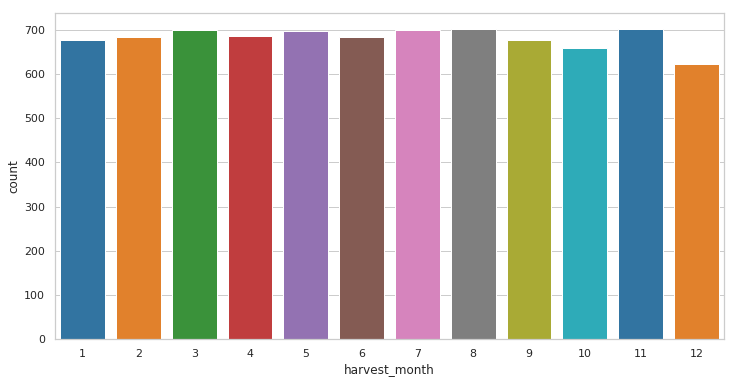

In [18]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="harvest_month", palette="tab10", data=df_all)

### Production per type

The 'type' of train/test is not established in the documentation, but, I will try to understand this variable.


In [19]:
df_all.type.unique()

array([ 5,  6,  2,  1,  4,  3,  0, -1,  7])

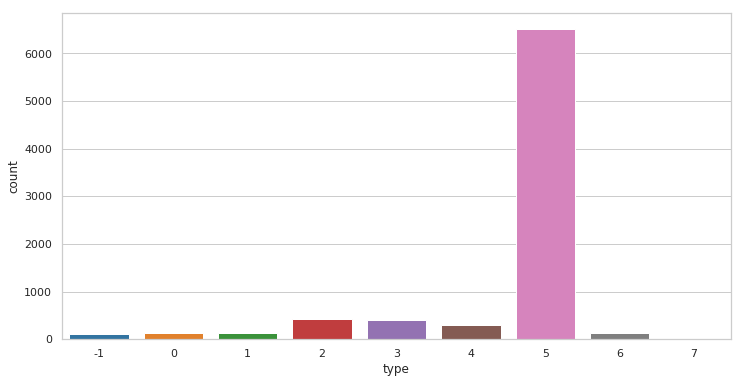

In [20]:
f, ax = plt.subplots(figsize=(12, 6))
#print(df_all.groupby(['type'])['date'].count())
sns.countplot(x="type", palette="tab10", data=df_all)

Most of the production is carried out using the type 5.

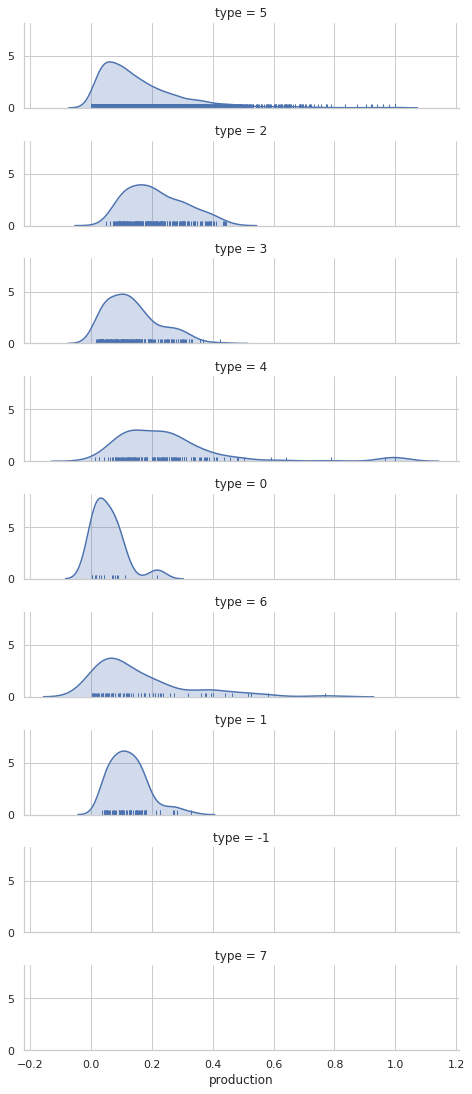

In [21]:
ordered_days = df_all.type.value_counts().index
g = sns.FacetGrid(df_all, row="type", row_order=ordered_days, height=1.7, aspect=4,)
g.map(sns.distplot, "production", hist=False, rug=True, kde_kws={"shade": True});

The production distribution by type is different. Although the predominant type is even type = 5, it may make sense to separate one model for each type.

(12, 2)


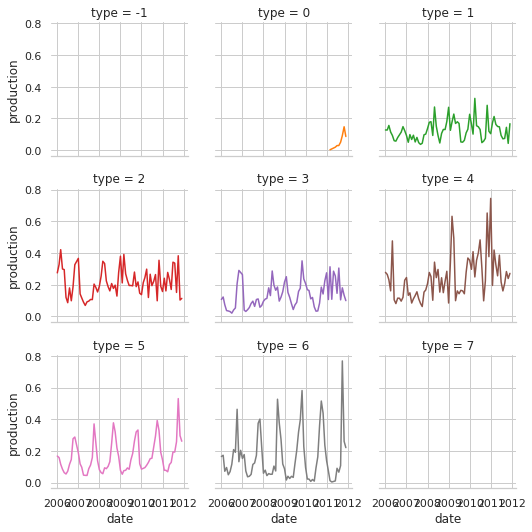

In [22]:
type_prod = df_all.groupby(['date', 'type']).mean()['production'].reset_index()

print(mean_production.shape)
mean_production.head(2)

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(type_prod, col="type", hue="type", palette="tab10",
                     col_wrap=3, height=2.5)

grid.map(plt.plot, "date", "production")

grid.fig.tight_layout(w_pad=1)
sns.despine(left=True)

The productive cycle and data are also different by type. This may reinforce the idea of separating forecast models by type.

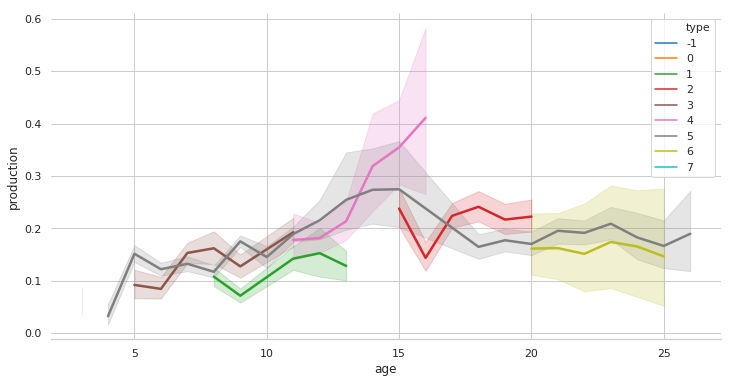

In [23]:
f, ax = plt.subplots(figsize=(12, 6))
#sns.lineplot(x='age', y="production", data=df_group, palette="tab10", linewidth=2.5)
sns.lineplot(x='age', y="production", data=df_all, hue='type', palette="tab10", linewidth=2.5, legend='full')

sns.despine(left=True)

Regarding age, apparently some types are only harvested at a certain age, that is, not all types have coliros during the clinical of 25 years. Only type 1 has production over 25 years.

## Field feature

field: an anonymous id given to each field in the dataset

In [24]:
df_all.field.unique()

array([ 0,  1,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 15, 16, 17,  2,  8,
       26, 18, 19, 20, 21, 22, 23, 24, 25, 27,  9])

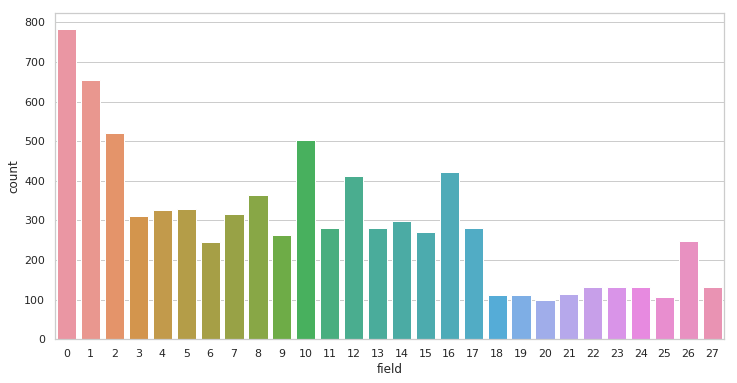

In [25]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="field", data=df_all)

Field 0 has the largest number of production records. Let's map some fields in time to identify if the pattern changes a lot in relation to the general.

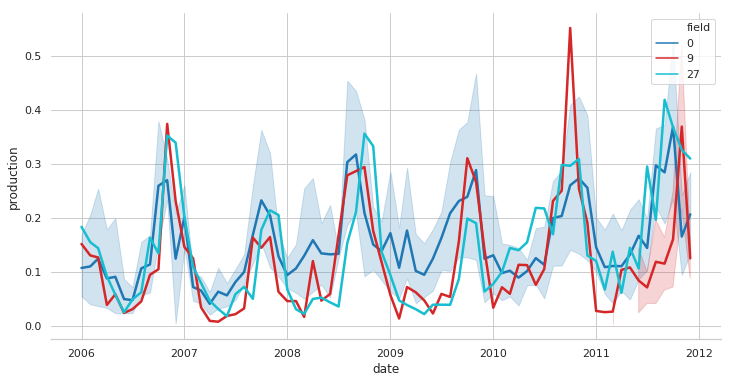

In [26]:
fields    = [0, 9, 27] 
df_filter = df_all[df_all.field.isin(fields)]

f, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='date', y="production", data=df_filter, hue='field', palette="tab10", linewidth=2.5, legend='full')

sns.despine(left=True)

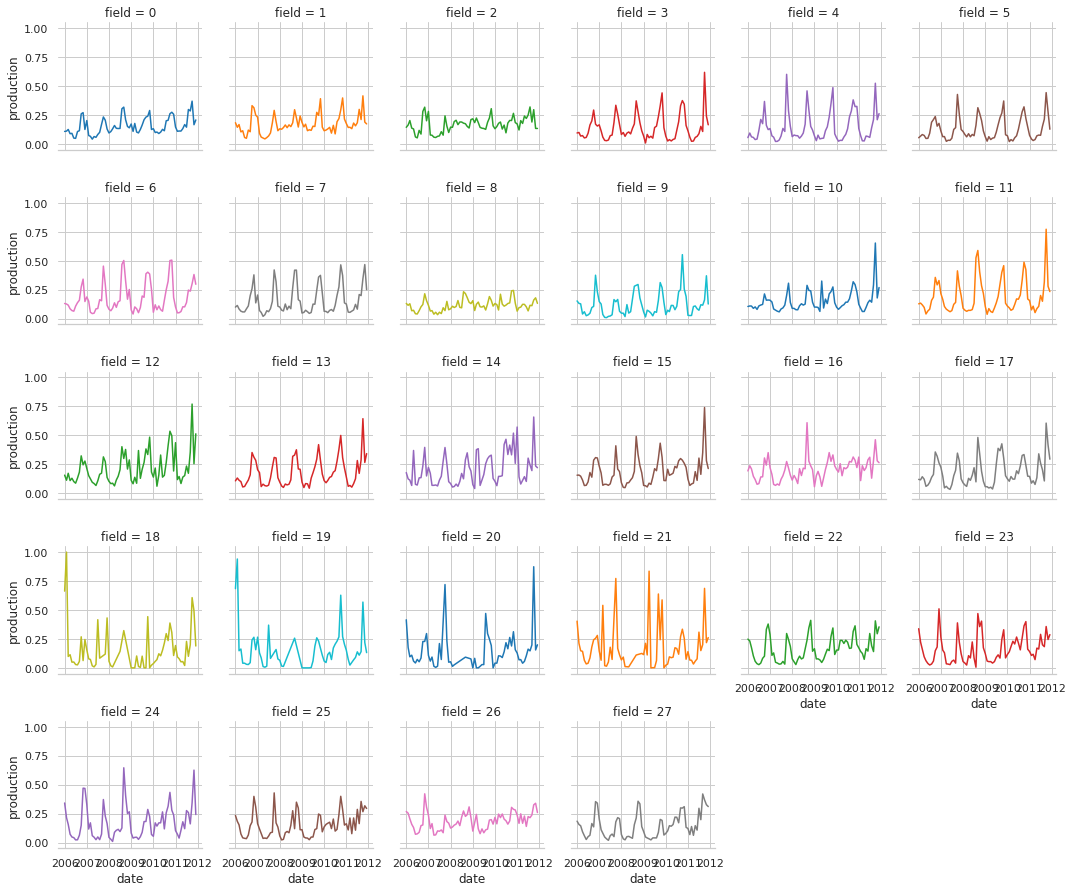

In [27]:
field_prod = df_all.groupby(['date', 'field']).mean()['production'].reset_index()

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(field_prod, col="field", hue="field", palette="tab10",
                     col_wrap=6, height=2.5)

grid.map(plt.plot, "date", "production")

grid.fig.tight_layout(w_pad=1)
sns.despine(left=True)

Some changes, but the default is apparently the same as previously shown. Apparently all fields have production in the dataset presented for the period.

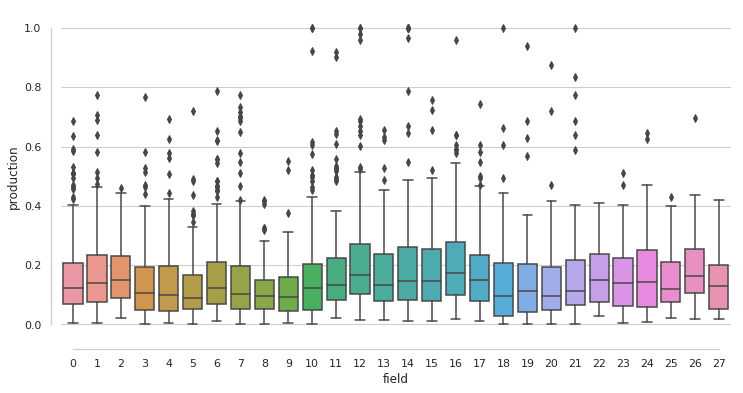

In [28]:
f, ax = plt.subplots(figsize=(12, 6))

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="field", y="production", data=df_all)
sns.despine(offset=10, trim=True)

The average production per field is similar. Few variations.

## Field data (field_*.csv)

These files hold atmospheric data from January 2002 to December 2017, and can be used to estimate the weather conditions during the development of the plant. Notice that weather does influence the production. Using only a single month prior to harvest is probably too little data. Participants should decide how far back in the past they want to look when training models.



In [29]:
# read
df_field = pd.read_csv(path+'field-0.csv')
df_field['field'] = 0
for i in range(1, 28):
    _df_field = pd.read_csv(path+'field-{}.csv'.format(i))
    _df_field['field'] = i
    df_field = pd.concat([df_field, _df_field])

# remove duplicates
df_field = df_field.drop_duplicates()

# Group 
df_field = df_field.groupby(['month', 'year', 'field']).mean().reset_index()
print(df_field.shape)
df_field.head()

(5376, 11)


,month,year,field,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation
0,1,2002,0,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55
1,1,2002,1,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55
2,1,2002,2,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55
3,1,2002,3,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55
4,1,2002,4,26.008,24.434,1.8453,0.32984,0.32597,0.31477,0.29513,361.55


In [30]:
# df_all
df_all   = pd.merge(df_all, df_field, left_on=['harvest_year', 'harvest_month','field'], 
                    right_on=['year', 'month', 'field'], how='inner').reset_index()

print(df_all.shape)
df_all.head()

(8186, 19)


,index,Id,age,field,harvest_month,harvest_year,production,type,date,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Soilwater_L2,Soilwater_L3,Soilwater_L4,Precipitation
0,0,24,21,0,1,2006,0.121454,5,2006-01-01,1,2006,26.595,24.74,1.9897,0.34587,0.34462,0.33994,0.32083,341.51
1,1,1556,15,0,1,2006,0.212025,2,2006-01-01,1,2006,26.595,24.74,1.9897,0.34587,0.34462,0.33994,0.32083,341.51
2,2,2351,4,0,1,2006,0.018644,5,2006-01-01,1,2006,26.595,24.74,1.9897,0.34587,0.34462,0.33994,0.32083,341.51
3,3,2352,5,0,1,2006,0.087408,3,2006-01-01,1,2006,26.595,24.74,1.9897,0.34587,0.34462,0.33994,0.32083,341.51
4,4,4226,6,0,1,2006,0.100588,5,2006-01-01,1,2006,26.595,24.74,1.9897,0.34587,0.34462,0.33994,0.32083,341.51


In [31]:
df_all.columns

Index(['index', 'Id', 'age', 'field', 'harvest_month', 'harvest_year',
       'production', 'type', 'date', 'month', 'year', 'temperature',
       'dewpoint', 'windspeed', 'Soilwater_L1', 'Soilwater_L2', 'Soilwater_L3',
       'Soilwater_L4', 'Precipitation'],
      dtype='object')

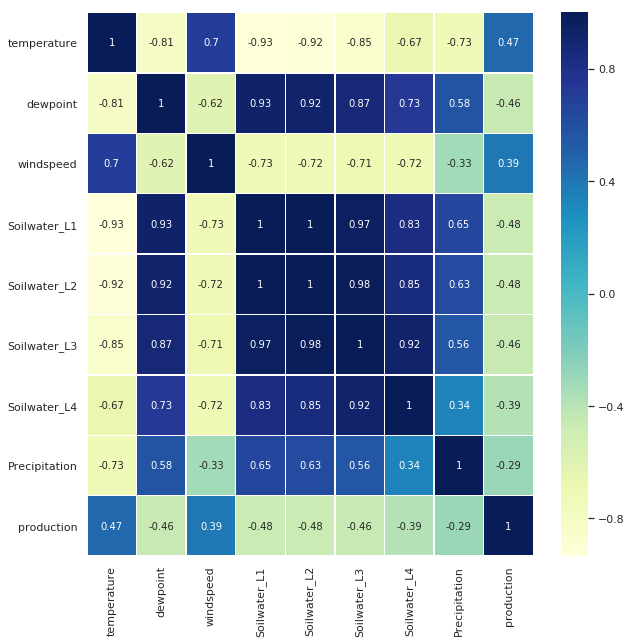

In [32]:
f, ax = plt.subplots(figsize=(10, 10))
features  = ['temperature', 'dewpoint',
               'windspeed', 'Soilwater_L1', 'Soilwater_L2', 'Soilwater_L3',
               'Soilwater_L4', 'Precipitation']
corr = df_all[features+['production']].corr()

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, linewidths=.5,cmap="YlGnBu")

An important point is that the variables Soilwater_l * have high correlation between each other and with the variable dewpoint. I do not think it's necessary to use all.

In [33]:
# Features i will duplicate with the past months
features  = ['temperature', 'dewpoint', 'windspeed', 'Precipitation', 'Soilwater_L1']

df_all    = df_all.drop(columns=['Soilwater_L2', 'Soilwater_L3','Soilwater_L4'])

In [34]:
#df_all2 = df_all.copy()
df_all.head()

,index,Id,age,field,harvest_month,harvest_year,production,type,date,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Precipitation
0,0,24,21,0,1,2006,0.121454,5,2006-01-01,1,2006,26.595,24.74,1.9897,0.34587,341.51
1,1,1556,15,0,1,2006,0.212025,2,2006-01-01,1,2006,26.595,24.74,1.9897,0.34587,341.51
2,2,2351,4,0,1,2006,0.018644,5,2006-01-01,1,2006,26.595,24.74,1.9897,0.34587,341.51
3,3,2352,5,0,1,2006,0.087408,3,2006-01-01,1,2006,26.595,24.74,1.9897,0.34587,341.51
4,4,4226,6,0,1,2006,0.100588,5,2006-01-01,1,2006,26.595,24.74,1.9897,0.34587,341.51


Relationship between the thermal variables, in the case this relation is for the harvest month itself. There is a good chance that previous months have relations with future production as well, it is necessary to investigate this relationship and how far it extends.

In [35]:
df_group = df_all.groupby(['field', 'date']).mean().reset_index()[['field', 'date', 'production'] + features ]
df_group = df_group.sort_values(['field', 'date'])
print(df_group.shape)
df_group.head()

(3753, 8)


,field,date,production,temperature,dewpoint,windspeed,Precipitation,Soilwater_L1
0,0,2006-01-01,0.108024,26.595,24.740,1.9897,341.51,0.34587
1,0,2006-02-01,0.110836,26.204,24.626,2.1281,309.01,0.35104
2,0,2006-03-01,0.125208,26.019,24.734,2.1760,452.42,0.36100
3,0,2006-04-01,0.088623,25.978,24.882,1.5105,516.34,0.36575
4,0,2006-05-01,0.091603,26.171,24.843,1.6832,349.06,0.36109


In [36]:
# Collect shift values of variables in all features time
period = 2

new_features = {}
for f in features:
    new_features[f] = []
    for i in range(1, period):
        new_features[f].append('{}_{}'.format(f, i))
        df_group['{}_{}'.format(f, i)] = df_group[f].shift(i).fillna(df_group[f].mean())
        #df_group['{}_{}'.format(f, i)] = df_group[f].rolling(i, min_periods=1).mean().fillna(df_group.temperature.mean())

Correlation analysis of the production variable with each variable in time. Uses a period of 11 months, a complete annual cycle. Each month is related to the correlation of production

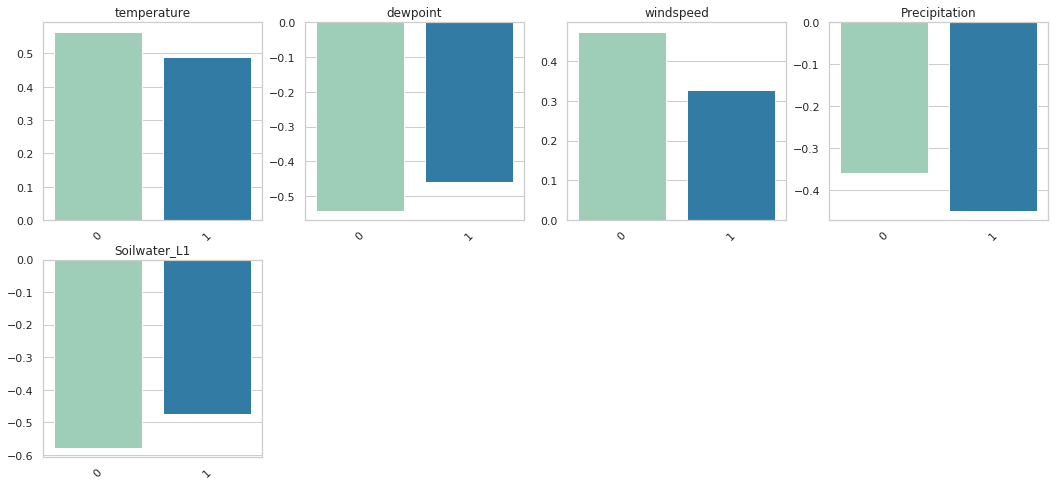

In [37]:
fig = plt.figure(figsize=(18, 8))

for i in range(1, len(features)+1):
    ax1 = fig.add_subplot(240+i)
    
    f = features[i-1]
    f_filter = [f] + new_features[f]+['production']
    corr    = df_group[f_filter].corr()
    g = sns.barplot(x=[i-1 for i in range(1, period+1)], y=corr['production'].values[:-1], palette="YlGnBu", ax=ax1)
    plt.title(f)
    plt.xticks(rotation=45)
plt.show() #corr['production'].keys().values[:-1]

In [38]:
df_all.head()

,index,Id,age,field,harvest_month,harvest_year,production,type,date,month,year,temperature,dewpoint,windspeed,Soilwater_L1,Precipitation
0,0,24,21,0,1,2006,0.121454,5,2006-01-01,1,2006,26.595,24.74,1.9897,0.34587,341.51
1,1,1556,15,0,1,2006,0.212025,2,2006-01-01,1,2006,26.595,24.74,1.9897,0.34587,341.51
2,2,2351,4,0,1,2006,0.018644,5,2006-01-01,1,2006,26.595,24.74,1.9897,0.34587,341.51
3,3,2352,5,0,1,2006,0.087408,3,2006-01-01,1,2006,26.595,24.74,1.9897,0.34587,341.51
4,4,4226,6,0,1,2006,0.100588,5,2006-01-01,1,2006,26.595,24.74,1.9897,0.34587,341.51


In [39]:
df_group= df_group.drop(features+['production'], axis=1)
df_group.head()

,field,date,temperature_1,dewpoint_1,windspeed_1,Precipitation_1,Soilwater_L1_1
0,0,2006-01-01,27.482751,23.767951,2.1562,252.957335,0.308304
1,0,2006-02-01,26.595000,24.740000,1.9897,341.510000,0.345870
2,0,2006-03-01,26.204000,24.626000,2.1281,309.010000,0.351040
3,0,2006-04-01,26.019000,24.734000,2.1760,452.420000,0.361000
4,0,2006-05-01,25.978000,24.882000,1.5105,516.340000,0.365750


In [40]:
df_all = df_all.drop(['index', 'month', 'year'], axis=1)
df_all = pd.merge(df_all, df_group, left_on=['field', 'date'], right_on=['field','date'], how='inner').reset_index()

print(df_all.shape)
df_all.head()

(8186, 19)


,index,Id,age,field,harvest_month,harvest_year,production,type,date,temperature,dewpoint,windspeed,Soilwater_L1,Precipitation,temperature_1,dewpoint_1,windspeed_1,Precipitation_1,Soilwater_L1_1
0,0,24,21,0,1,2006,0.121454,5,2006-01-01,26.595,24.74,1.9897,0.34587,341.51,27.482751,23.767951,2.1562,252.957335,0.308304
1,1,1556,15,0,1,2006,0.212025,2,2006-01-01,26.595,24.74,1.9897,0.34587,341.51,27.482751,23.767951,2.1562,252.957335,0.308304
2,2,2351,4,0,1,2006,0.018644,5,2006-01-01,26.595,24.74,1.9897,0.34587,341.51,27.482751,23.767951,2.1562,252.957335,0.308304
3,3,2352,5,0,1,2006,0.087408,3,2006-01-01,26.595,24.74,1.9897,0.34587,341.51,27.482751,23.767951,2.1562,252.957335,0.308304
4,4,4226,6,0,1,2006,0.100588,5,2006-01-01,26.595,24.74,1.9897,0.34587,341.51,27.482751,23.767951,2.1562,252.957335,0.308304


### soil_data.csv

Information on the soil on which each field is

In [41]:
df_soil = pd.read_csv(path+'soil_data.csv')
print(df_soil.shape)
df_soil.head()

(28, 73)


,field,BDRICM_BDRICM_M,BDRLOG_BDRLOG_M,BDTICM_BDTICM_M,BLDFIE_sl1,BLDFIE_sl2,BLDFIE_sl3,BLDFIE_sl4,BLDFIE_sl5,BLDFIE_sl6,...,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,4,200,7,6973,1345,1308,1361,1413,1486,1503,...,21,19,20,47,48,47,42,40,40,39
1,3,200,9,7272,1297,1287,1323,1428,1492,1508,...,23,22,22,44,45,43,40,36,37,36
2,2,200,7,7281,1266,1249,1310,1387,1463,1491,...,21,21,22,46,46,45,40,39,39,39
3,1,200,6,7457,1297,1277,1345,1409,1480,1506,...,21,21,21,46,47,46,42,40,40,40
4,7,200,8,6771,1305,1289,1333,1438,1497,1510,...,22,21,22,44,45,44,40,38,38,37


In [42]:
# Join datasets
df_all_soil = pd.merge(df_all, df_soil, on='field', how='inner')
print(df_all_soil.shape)
df_all_soil.head()

(8186, 91)


,index,Id,age,field,harvest_month,harvest_year,production,type,date,temperature,...,SLTPPT_sl5,SLTPPT_sl6,SLTPPT_sl7,SNDPPT_sl1,SNDPPT_sl2,SNDPPT_sl3,SNDPPT_sl4,SNDPPT_sl5,SNDPPT_sl6,SNDPPT_sl7
0,0,24,21,0,1,2006,0.121454,5,2006-01-01,26.595,...,22,22,23,44,45,44,39,38,37,36
1,1,1556,15,0,1,2006,0.212025,2,2006-01-01,26.595,...,22,22,23,44,45,44,39,38,37,36
2,2,2351,4,0,1,2006,0.018644,5,2006-01-01,26.595,...,22,22,23,44,45,44,39,38,37,36
3,3,2352,5,0,1,2006,0.087408,3,2006-01-01,26.595,...,22,22,23,44,45,44,39,38,37,36
4,4,4226,6,0,1,2006,0.100588,5,2006-01-01,26.595,...,22,22,23,44,45,44,39,38,37,36


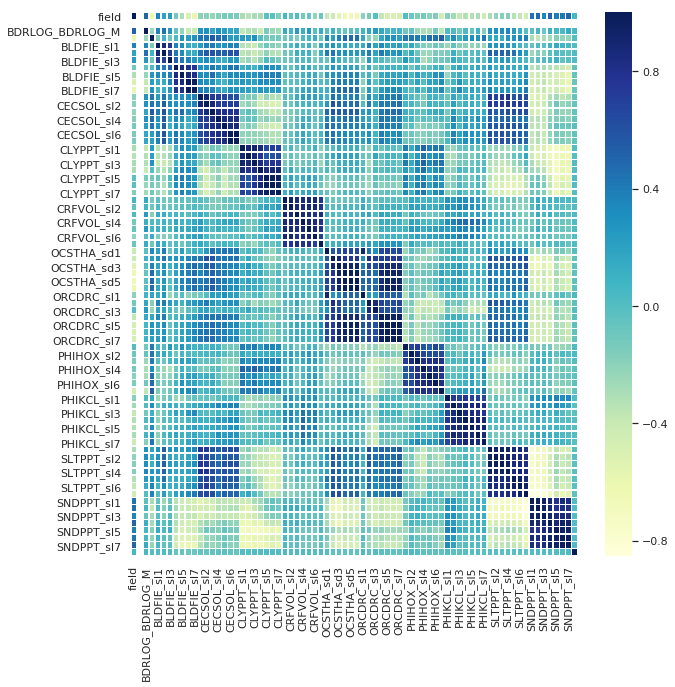

In [43]:
f, ax = plt.subplots(figsize=(10, 10))
features  = list(df_soil.columns.values) + ['production']
corr      = df_all_soil[features].corr()

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, linewidths=.5,cmap="YlGnBu")

### Feature Importance Measures

Find the main features for the production target. Uses a RandomRorest to identify features


In [44]:
df_all.columns

Index(['index', 'Id', 'age', 'field', 'harvest_month', 'harvest_year',
       'production', 'type', 'date', 'temperature', 'dewpoint', 'windspeed',
       'Soilwater_L1', 'Precipitation', 'temperature_1', 'dewpoint_1',
       'windspeed_1', 'Precipitation_1', 'Soilwater_L1_1'],
      dtype='object')

In [45]:
## Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

## This line instantiates the model. 
rf = RandomForestRegressor() 

# data
df      = df_all_soil[~df_all_soil.production.isna()]
X_train = df.drop(['production', 'date', 'Id', 'index'], axis=1)
y_train = df.production.values

## Fit the model on your training data.
rf.fit(X_train, y_train) 

/home/eraldo/miniconda2/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
# feature_importances
feature_importances = pd.DataFrame(rf.feature_importances_, 
                                   index = X_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False).reset_index()
feature_importances.head()

,index,importance
0,age,0.139723
1,temperature,0.110038
2,dewpoint,0.099994
3,Precipitation_1,0.096835
4,Soilwater_L1,0.064723


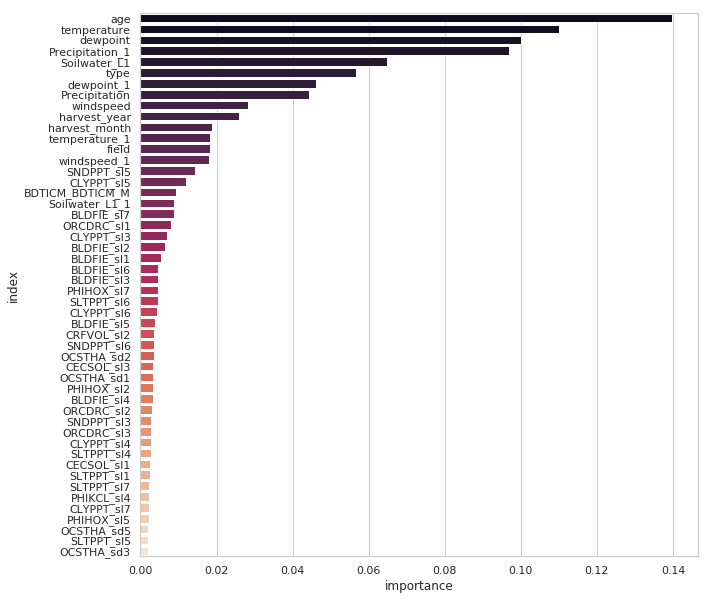

In [47]:
size = 50
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x="importance", y='index', data=feature_importances.head(size), palette="rocket")

Apparently the features coming from *soil_data.csv* do not have much relevance to the model. I think using only the field field is a better feature than adding 73 features of *soil_data.csv*

## Base Model 

Creation of a baseline model to finalize the competition submission pipeline. The idea is to create the most basic for future improvements.

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection

### Prepare Dataset

In [49]:
# Load Dataset
# y~X
df_train = df_all_soil[~df_all_soil.production.isna()]
X        = df_train.drop(['production', 'date', 'Id'], axis=1)

#Filter importance
features = list(feature_importances['index'].values)[:15]
X        = X[features]
# y
y        = df.production.values

# normalize
scaler = StandardScaler()
norm_X = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(norm_X, y, test_size=0.2, random_state=1)
(X_train.shape, X_test.shape)

((3260, 15), (816, 15))

### Train Model

In [50]:
base_model = RandomForestRegressor(random_state=1)
base_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [51]:
y_hat = base_model.predict(X_test)

score_mae = sklearn.metrics.mean_absolute_error(y_test, y_hat)
r2        = sklearn.metrics.r2_score(y_test, y_hat)

#MAE score 0.04333937538802412
print("MAE score", score_mae)

MAE score 0.048038683955229575


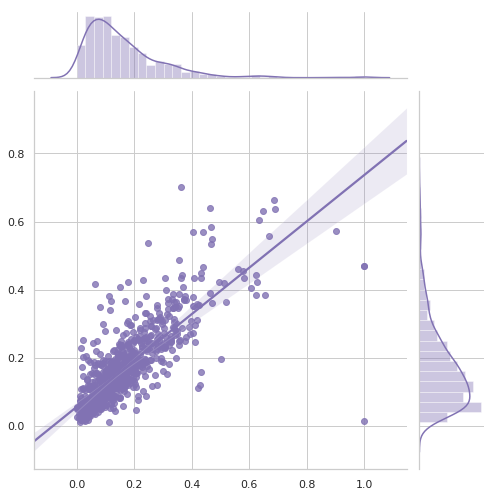

In [52]:
sns.jointplot(x=y_test, y=y_hat, kind="reg", color="m", height=7)
#sns.scatterplot(y=(y_test-y_hat), x=[i for i in range(len(y_test))], ax=ax2)

In [53]:
#df_all.to_csv('dataset/df_all.csv')

### Submission

It makes the predict of the basic model and creates the sample to substrate in kaggle, finishing the complete pipeline

In [54]:
df_test = df_all[df_all.production.isna()]
print(df_test.shape)
df_test.tail(2)

(4110, 19)


,index,Id,age,field,harvest_month,harvest_year,production,type,date,temperature,dewpoint,windspeed,Soilwater_L1,Precipitation,temperature_1,dewpoint_1,windspeed_1,Precipitation_1,Soilwater_L1_1
8184,8184,9097,8,3,9,2017,NaN,5,2017-09-01,28.604,23.572,2.3288,0.27126,92.301,28.502,23.580,2.0800,151.720,0.27522
8185,8185,9098,8,3,10,2017,NaN,5,2017-10-01,28.660,23.361,2.6919,0.25575,196.660,28.604,23.572,2.3288,92.301,0.27126


Build test dataset to predict 

In [55]:
#Filter importance
X  = df_test[features]
X  = scaler.transform(X) # normalize

# y
y = df.production.values

KeyError: "['SNDPPT_sl5'] not in index"

In [ ]:
prod = base_model.predict(X) 
prod[:10]

In [ ]:
## create a submission.csv
import math
f = open('../submissions/submission.csv', 'w')
f.write("Id,production\n")
for i in range(len(df_test.Id.values)):
    _id = df_test.Id.values[i]
    p   = math.fabs(prod[i])
    f.write("{},{}\n".format(_id, p))
f.close()